In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Data analysis

from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
# получили данные в виде sklearn.utils.Bunch
print(type(boston))

<class 'sklearn.utils.Bunch'>


In [3]:
# из sklearn.utils.Bunch можем достать массивы Numpy

print(type(boston.data))
print(type(boston.target))
print(type(boston.feature_names))
boston.feature_names

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
# сконструируем для удобства отображения DataFrame

data = np.c_[boston.data, boston.target]
columns = np.append(boston.feature_names, ["target"])
df = pd.DataFrame(data, columns=columns)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
# Loading the data

def load_data():
    from sklearn.datasets import load_boston
    from sklearn.model_selection import train_test_split
    
    boston = load_boston()
    
    train_set_x, test_set_x, train_set_y, test_set_y = train_test_split(boston.data, boston.target, test_size=0.33, random_state=42)

    train_set_y = train_set_y.reshape((1, train_set_y.shape[0]))
    test_set_y = test_set_y.reshape((1, test_set_y.shape[0]))
    
    return train_set_x.T, train_set_y, test_set_x.T, test_set_y, boston

train_set_x, train_set_y, test_set_x, test_set_y, visualization_set = load_data()

In [6]:
# получили размерности в формате (n_features x n_samples)

print(train_set_x.shape, train_set_y.shape, test_set_x.shape, test_set_y.shape)

(13, 339) (1, 339) (13, 167) (1, 167)


In [7]:
m_train = train_set_x.shape[1]
m_test = test_set_x.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))

print ("\ntrain_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 339
Number of testing examples: m_test = 167

train_set_x shape: (13, 339)
train_set_y shape: (1, 339)
test_set_x shape: (13, 167)
test_set_y shape: (1, 167)


**Expected Output for m_train, m_test**: 
<table style="width:15%">
  <tr>
      <td><b>m_train</b></td>
    <td> 339 </td> 
  </tr>
  
  <tr>
    <td><b>m_test</b></td>
    <td> 167 </td> 
  </tr>
</table>


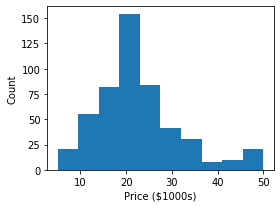

In [8]:
plt.figure(figsize=(4, 3))
plt.hist(visualization_set.target)
plt.xlabel("Price ($1000s)")
plt.ylabel("Count")
plt.tight_layout()

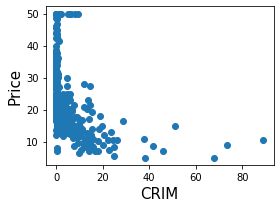

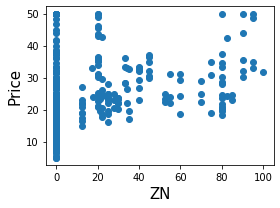

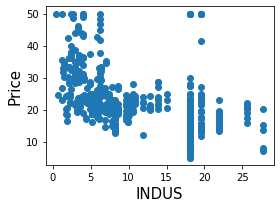

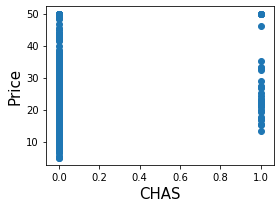

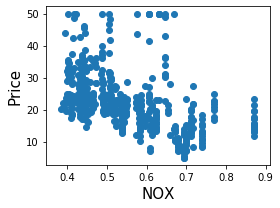

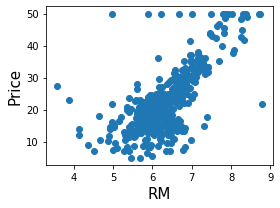

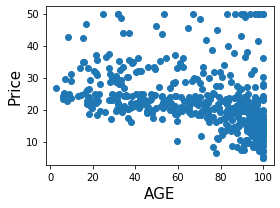

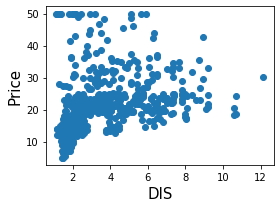

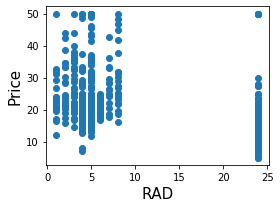

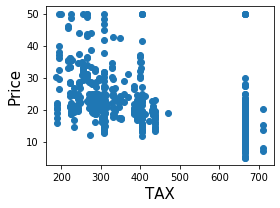

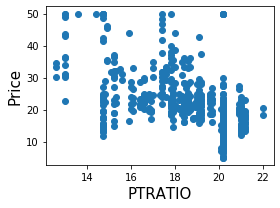

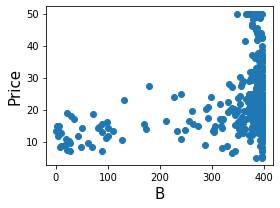

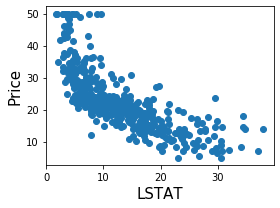

In [9]:
for index, feature_name in enumerate(visualization_set.feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(visualization_set.data[:, index], visualization_set.target)
    plt.ylabel("Price", size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

In [10]:
all_set_x = np.concatenate([train_set_x, test_set_x], axis=1)

mean = all_set_x.mean(axis=1, keepdims=True)
std = all_set_x.std(axis=1, keepdims=True)

train_set_x = (train_set_x - mean) / std
test_set_x = (test_set_x - mean) / std

In [11]:
np.mean(train_set_x, axis=1)

array([-0.030513  ,  0.01515824,  0.0182503 ,  0.02966075,  0.02421217,
        0.06081882,  0.01298732, -0.01548507, -0.007545  ,  0.00531916,
       -0.08964362,  0.01926924, -0.02179038])

In [12]:
np.mean(test_set_x, axis=1)

array([ 0.06193957, -0.03077032, -0.03704703, -0.06020954, -0.04914925,
       -0.12345856, -0.02636348,  0.03143377,  0.01531589, -0.01079757,
        0.18197117, -0.0391154 ,  0.04423317])

In [13]:
np.std(train_set_x, axis=1)

array([0.89354981, 0.98487904, 1.01522874, 1.04873361, 1.01508222,
       1.0252644 , 0.99250448, 1.01795008, 0.99503085, 0.98635343,
       1.0367859 , 0.97001774, 1.00510634])

In [14]:
np.std(test_set_x, axis=1)

array([1.18467125, 1.02932596, 0.96729198, 0.88989623, 0.96679913,
       0.93454976, 1.01453409, 0.96176708, 1.00983854, 1.02705958,
       0.89357746, 1.05717352, 0.98807666])

In [16]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.zeros((dim, 1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [17]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


In [18]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (number of features, 1)
    b -- bias, a scalar
    X -- data of shape (number of features, number of examples)
    Y -- results of shape (1, number of examples)
    
    Return:
    cost -- cost function for linear regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation.
    - Use np.dot() to avoid for-loops in favor of code vectorization
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    H = np.dot(w.T, X) + b   # compute activation
    
    deltas = H - Y    
    
    cost = np.sum(deltas ** 2) / (2 * m) # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)    
    deltas_scaled = deltas / m    
    
    dw = np.dot(X, deltas_scaled.T)
    db = np.sum(deltas_scaled)    
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [19]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[12.8       ]
 [30.82666667]]
db = 4.533333333333333
cost = 41.49333333333333


In [20]:
# optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (number of features, 1)
    b -- bias, a scalar
    X -- data of shape (number of features, number of examples)
    Y -- results of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation   
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule        
        w = w - learning_rate * dw
        b = b - learning_rate * db
               
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [21]:
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[-0.04675219]
 [-0.12676061]]
b = 1.223758731602527
dw = [[ 0.12274692]
 [-0.09406359]]
db = 0.36833971156600487


In [22]:
# predict

def predict(w, b, X):
    """
    Predict using learned linear regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (number of features, 1)
    b -- bias, a scalar
    X -- data of shape (number of features, number of examples)
    
    Returns:
    H -- a numpy array (vector) containing all predictions for the examples in X
    """
    
    m = X.shape[1]
    
    # Compute vector "H"    
    H = np.dot(w.T, X) + b
        
    assert(H.shape == (1, m))
    
    return H

In [23]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[ 0.0897392   0.03843181 -0.6367585 ]]


In [24]:
# model

def model(X_train, Y_train, X_test, Y_test, num_iterations=3000, learning_rate=0.5, print_cost=False):
    """
    Builds the linear regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (number of features, m_train)
    Y_train -- training values represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (number of features, m_test)
    Y_test -- test values represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
           
    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost=False)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)    

    # Print train/test Errors
    print ("Train RMSE: {} ".format(np.sqrt(np.mean((Y_prediction_train - Y_train) ** 2))))
    print ("Test RMSE: {} ".format(np.sqrt(np.mean((Y_prediction_test - Y_test) ** 2))))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [25]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=3000, learning_rate=0.05, print_cost=True)

Train RMSE: 4.794269062398092 
Test RMSE: 4.5523720631974145 


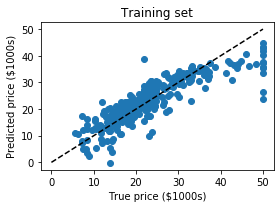

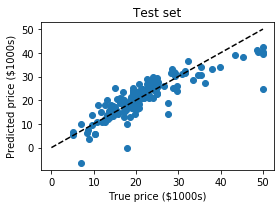

In [26]:
# Training set
plt.figure(figsize=(4, 3))
plt.title("Training set")
plt.scatter(train_set_y, d["Y_prediction_train"])
plt.plot([0, 50], [0, 50], "--k")
plt.axis("tight")
plt.xlabel("True price ($1000s)")
plt.ylabel("Predicted price ($1000s)")
plt.tight_layout()

# Test set
plt.figure(figsize=(4, 3))
plt.title("Test set")
plt.scatter(test_set_y, d["Y_prediction_test"])
plt.plot([0, 50], [0, 50], "--k")
plt.axis("tight")
plt.xlabel("True price ($1000s)")
plt.ylabel("Predicted price ($1000s)")
plt.tight_layout()

In [27]:
# применение модели из scikit learn

import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (4, 2)
Shape of y: (4,)


In [28]:
reg = LinearRegression()
reg.fit(X, y)
reg.score(X, y)

1.0

In [29]:
reg.coef_

array([1., 2.])

In [30]:
reg.intercept_

3.000000000000001

In [31]:
reg.predict(np.array([[3, 5]]))

array([16.])

In [32]:
# применение модели scikit learn для датасета boston

train_set_x, train_set_y, test_set_x, test_set_y, visualization_set = load_data()
print(train_set_x.shape, train_set_y.shape, test_set_x.shape, test_set_y.shape)

(13, 339) (1, 339) (13, 167) (1, 167)


In [33]:
# преобразуем в привычный формат - из (n_features x n_samples) в (n_samples x n_features)

train_set_x = train_set_x.T
train_set_y = train_set_y.T
test_set_x = test_set_x.T
test_set_y = test_set_y.T
print(train_set_x.shape, train_set_y.shape, test_set_x.shape, test_set_y.shape)

(339, 13) (339, 1) (167, 13) (167, 1)


In [34]:
# mean and std until standartisation

np.mean(train_set_x, axis=0)

array([3.35132407e+00, 1.17168142e+01, 1.12618584e+01, 7.66961652e-02,
       5.57497935e-01, 6.32732448e+00, 6.89401180e+01, 3.76246785e+00,
       9.48377581e+00, 4.09132743e+02, 1.82616519e+01, 3.58431475e+02,
       1.24976106e+01])

In [35]:
np.mean(test_set_x, axis=0)

array([4.14577281e+00, 1.06467066e+01, 1.08828743e+01, 5.38922156e-02,
       5.49005389e-01, 6.19797605e+00, 6.78335329e+01, 3.86116766e+00,
       9.68263473e+00, 4.06419162e+02, 1.88491018e+01, 3.53106527e+02,
       1.29686228e+01])

In [36]:
np.std(train_set_x, axis=0)

array([7.67831051e+00, 2.29470864e+01, 6.95794182e+00, 2.66108744e-01,
       1.17509081e-01, 7.19656166e-01, 2.79102509e+01, 2.14138866e+00,
       8.65542624e+00, 1.66072815e+02, 2.24236592e+00, 8.84700873e+01,
       7.17043030e+00])

In [37]:
np.std(test_set_x, axis=0)

array([1.01799291e+01, 2.39826728e+01, 6.62940384e+00, 2.25804882e-01,
       1.11919679e-01, 6.55981515e-01, 2.85297462e+01, 2.02320050e+00,
       8.78423317e+00, 1.72926530e+02, 1.93263397e+00, 9.64190961e+01,
       7.04894054e+00])

In [38]:
# стандартизуем обучающие и тестовые данные

from sklearn.preprocessing import StandardScaler

all_set_x = np.concatenate([train_set_x, test_set_x], axis=0)
scaler = StandardScaler()
scaler.fit(all_set_x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:
train_set_x = scaler.transform(train_set_x)
test_set_x = scaler.transform(test_set_x)

In [40]:
# mean and std after standartisation

train_set_x.mean(axis=0)

array([-0.030513  ,  0.01515824,  0.0182503 ,  0.02966075,  0.02421217,
        0.06081882,  0.01298732, -0.01548507, -0.007545  ,  0.00531916,
       -0.08964362,  0.01926924, -0.02179038])

In [41]:
train_set_x.std(axis=0)

array([0.89354981, 0.98487904, 1.01522874, 1.04873361, 1.01508222,
       1.0252644 , 0.99250448, 1.01795008, 0.99503085, 0.98635343,
       1.0367859 , 0.97001774, 1.00510634])

In [42]:
test_set_x.mean(axis=0)

array([ 0.06193957, -0.03077032, -0.03704703, -0.06020954, -0.04914925,
       -0.12345856, -0.02636348,  0.03143377,  0.01531589, -0.01079757,
        0.18197117, -0.0391154 ,  0.04423317])

In [43]:
test_set_x.std(axis=0)

array([1.18467125, 1.02932596, 0.96729198, 0.88989623, 0.96679913,
       0.93454976, 1.01453409, 0.96176708, 1.00983854, 1.02705958,
       0.89357746, 1.05717352, 0.98807666])

In [44]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(train_set_x, train_set_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
reg.score(train_set_x, train_set_y)

0.7392344370995025

In [46]:
reg.coef_

array([[-1.10635165,  0.88125824,  0.39895267,  0.82178915, -1.87186781,
         2.73893756, -0.36137727, -2.99183136,  2.04291227, -1.38288067,
        -2.00864576,  1.07344103, -3.90633915]])

In [47]:
reg.intercept_

array([22.46603401])

In [48]:
predictions_train = reg.predict(train_set_x)
print(predictions_train.shape)

(339, 1)


In [49]:
predictions_test = reg.predict(test_set_x)
print(predictions_test.shape)

(167, 1)


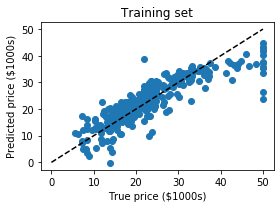

In [50]:
# Training set
plt.figure(figsize=(4, 3))
plt.title("Training set")
plt.scatter(train_set_y, predictions_train)
plt.plot([0, 50], [0, 50], "--k")
plt.axis("tight")
plt.xlabel("True price ($1000s)")
plt.ylabel("Predicted price ($1000s)")
plt.tight_layout()

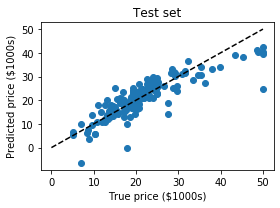

In [51]:
# Test set
plt.figure(figsize=(4, 3))
plt.title("Test set")
plt.scatter(test_set_y, predictions_test)
plt.plot([0, 50], [0, 50], "--k")
plt.axis("tight")
plt.xlabel("True price ($1000s)")
plt.ylabel("Predicted price ($1000s)")
plt.tight_layout()